In [ ]:
#CLASSIFICATION

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
dataset = keras.datasets.fashion_mnist

In [4]:
(train_x , train_y) , (test_x, test_y) = dataset.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
train_x.shape

(60000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

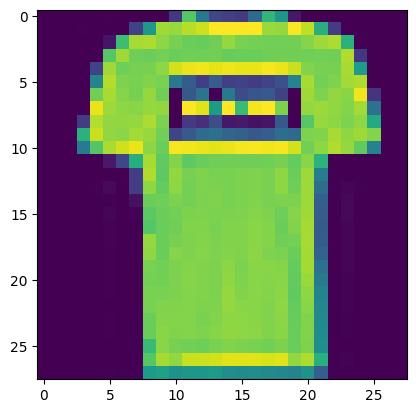

In [7]:
plt.imshow(train_x[1])

In [8]:
train_y[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28,28]),
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(5,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
wight , bias = model.layers[1].get_weight()

AttributeError: 'Dense' object has no attribute 'get_weight'

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd', metrics=["accuracy"])

In [11]:

history = model.fit(train_x/255, train_y, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.3222 - loss: 1.8971 - val_accuracy: 0.5619 - val_loss: 1.2161
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5829 - loss: 1.1530 - val_accuracy: 0.6776 - val_loss: 0.9723
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7009 - loss: 0.8936 - val_accuracy: 0.7278 - val_loss: 0.7628
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7311 - loss: 0.7399 - val_accuracy: 0.7496 - val_loss: 0.6892
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7533 - loss: 0.6839 - val_accuracy: 0.7588 - val_loss: 0.6703
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7802 - loss: 0.6298 - val_accuracy: 0.7867 - val_loss: 0.6156
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7988 - loss: 0.5999 - val_accuracy: 0.8045 - val_loss: 0.5981
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8173 - loss: 0.5619 - 

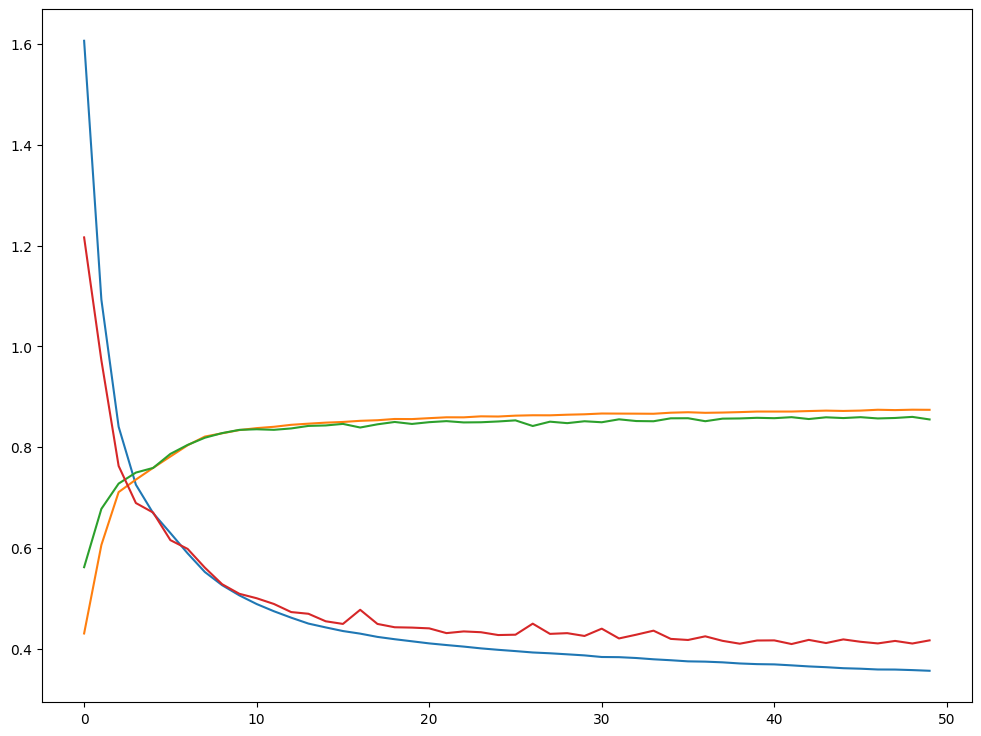

In [12]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(history.history['loss'], label="loss")
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.plot(history.history['val_loss'], label='val_loss')

In [13]:
y_hat = model.predict(test_x/255)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [16]:
y_hat

array([[5.9720328e-08, 1.3681387e-07, 1.1661179e-07, ..., 3.6136199e-02,
        4.3707392e-03, 8.9361089e-01],
       [8.7471837e-03, 7.1762846e-04, 8.8357365e-01, ..., 2.4523144e-04,
        1.7750062e-03, 1.4780402e-04],
       [3.2983931e-05, 9.9995744e-01, 7.2060596e-10, ..., 5.9441186e-06,
        2.9651357e-08, 1.4281289e-14],
       ...,
       [5.2309498e-02, 7.3875894e-06, 1.7776123e-03, ..., 5.3781225e-08,
        7.0199072e-01, 3.8074410e-07],
       [1.2577091e-06, 9.9897170e-01, 7.0963413e-10, ..., 8.6951023e-04,
        2.8971232e-07, 3.9790376e-11],
       [3.6856161e-06, 7.4688669e-06, 5.8627411e-05, ..., 8.1453016e-03,
        2.2730820e-02, 7.0687878e-05]], dtype=float32)

In [27]:
import numpy as np
np.argmax(y_hat[1])

3845

In [28]:
test_y[1]

2

In [17]:
model.evaluate(test_x,test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7305 - loss: 130.9855


[137.79368591308594, 0.7281000018119812]

In [ ]:
#REGRESSION

In [34]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [35]:
fetch_california_housing

<function sklearn.datasets._california_housing.fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)>

In [63]:
dataset = fetch_california_housing()

In [64]:
train_x, test_x , train_y, test_y = train_test_split(dataset['data'],dataset['target'])

In [65]:
train_x_1, test_x_val , train_y_1, test_y_val = train_test_split(train_x,train_y)

In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
train_x_1

array([[   2.4281    ,   18.        ,    5.6496063 , ...,    2.58661417,
          36.29      , -119.15      ],
       [   1.8413    ,   28.        ,    5.04195804, ...,    2.90909091,
          39.1       , -121.57      ],
       [   1.8641    ,   43.        ,    3.40909091, ...,    3.92272727,
          33.95      , -118.21      ],
       ...,
       [   3.3629    ,    8.        ,    4.11504425, ...,    2.67433628,
          33.75      , -117.92      ],
       [   3.724     ,   38.        ,    4.48028674, ...,    2.26164875,
          37.92      , -122.31      ],
       [  10.5536    ,   28.        ,    7.83887468, ...,    2.81585678,
          33.77      , -118.46      ]])

In [68]:
X_train_s = StandardScaler().fit_transform(train_x_1)
X_test_s = StandardScaler().fit_transform(test_x)
test_x_val_s = StandardScaler().fit_transform(test_x_val)

In [69]:
X_train_s


array([[-0.75303384, -0.85318317,  0.08872947, ..., -0.04288408,
         0.30681059,  0.2129866 ],
       [-1.05835016, -0.0606769 , -0.15241159, ..., -0.01955565,
         1.62290089, -0.99492727],
       [-1.04648715,  1.1280825 , -0.80040379, ...,  0.05377226,
        -0.78915072,  0.68217628],
       ...,
       [-0.26665058, -1.64568944, -0.52025102, ..., -0.03653814,
        -0.88282263,  0.82692629],
       [-0.07876761,  0.73182937, -0.37530702, ..., -0.06639254,
         1.07023664, -1.36428936],
       [ 3.47472309, -0.0606769 ,  0.95752571, ..., -0.02630034,
        -0.87345544,  0.55739179]])

In [70]:
model = keras.models.Sequential([
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(5,activation="relu"),
keras.layers.Dense(1)
])

In [71]:
model.compile(loss='mean_squared_error',optimizer='sgd', metrics=["mean_absolute_error"])

In [75]:
history = model.fit(X_train_s,train_y_1,epochs=20, validation_data=(test_x_val_s, test_y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3912 - mean_absolute_error: 0.4418 - val_loss: 4.4628 - val_mean_absolute_error: 1.4720
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3783 - mean_absolute_error: 0.4410 - val_loss: 4.4354 - val_mean_absolute_error: 1.4556
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3973 - mean_absolute_error: 0.4468 - val_loss: 5.1398 - val_mean_absolute_error: 1.5687
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3846 - mean_absolute_error: 0.4406 - val_loss: 5.7356 - val_mean_absolute_error: 1.6479
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3853 - mean_absolute_error: 0.4436 - val_loss: 6.2315 - val_mean_absolute_error: 1.7086
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3655 - mean_absolute_error: 0.4319 - val_loss: 7.0977 - val_mean_absolute_error: 1.8203
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3846 - mean_absolute_error: 0.4379 - v

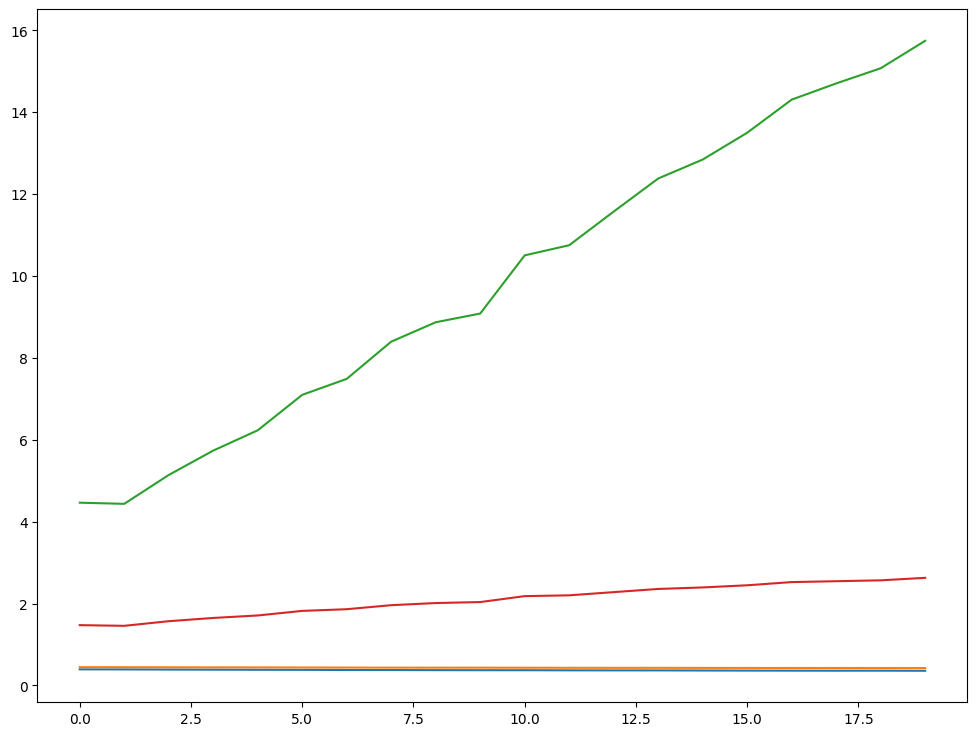

In [76]:
fig, ax = plt.subplots(figsize=(12,9))
ax.plot(history.history['loss'], label="loss")
ax.plot(history.history['mean_absolute_error'], label='mean_absolute_error')
ax.plot(history.history['val_loss'], label='val_loss')
ax.plot(history.history['val_mean_absolute_error'], label='val_mean_absolute_error')

In [81]:
X_train_s[1]

array([-1.05835016, -0.0606769 , -0.15241159,  0.14935119, -0.5366684 ,
       -0.01955565,  1.62290089, -0.99492727])

In [82]:
model.predict(X_train_s[1])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(8,), dtype=float32). Expected shape (None, 8), but input has incompatible shape (8,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(8,), dtype=float32)
  • training=False
  • mask=None